In [141]:
!python --version

Python 3.6.1 :: Continuum Analytics, Inc.


# MuSCAT2 Target list

In [33]:
targets="""HAT-P-44 b
HAT-P-20 b
EPIC 96233 b
GJ 436 b
WASP 21 b
WASP 12 b 
WASP 80 b
XO-2 b
QATAR-1 b
K2-95 b
COROT-5B b""".strip(' ').split('\n')

In [1]:
import exodata
print(exodata.__version__)
#load catalog
exocat = exodata.load_db_from_url()

2.1.7


In [34]:
target = exocat.searchPlanet(targets[0])

In [38]:
target.star.M

array(0.939) * M_s

In [43]:
planet_params = [exocat.searchPlanet(str(i)) for i in targets]
planet_params

[Planet('HAT-P-44 b'),
 Planet('HAT-P-20 b'),
 False,
 Planet('Gliese 436 b'),
 Planet('WASP-21 b'),
 Planet('WASP-12 b'),
 Planet('WASP-80 b'),
 Planet('CoRoT-2 b'),
 Planet('Qatar-1 b'),
 False,
 False]

remove False

In [52]:
planet_params = [planet_params[i] for i, planet in enumerate(planet_params) if planet is not False]

Star('HAT-P-44')

In [58]:
[i for i in planet_params]

[Planet('HAT-P-44 b'),
 Planet('HAT-P-20 b'),
 Planet('Gliese 436 b'),
 Planet('WASP-21 b'),
 Planet('WASP-12 b'),
 Planet('WASP-80 b'),
 Planet('CoRoT-2 b'),
 Planet('Qatar-1 b')]

In [53]:
mass = [float(planet_params[j].M.magnitude) for j in range(len(planet_params))]

Put in a df

In [65]:
import pandas as pd

names = [i.star for i in planet_params]
df_params = pd.DataFrame(mass, index=names, columns = ['mass'])
df_params

,mass
Star('HAT-P-44'),0.3920
Star('HAT-P-20'),7.2460
Star('Gliese 436'),0.0727
Star('WASP-21'),0.2760
Star('WASP-12'),1.4040
Star('WASP-80'),0.5540
Star('CoRoT-2'),3.3100
Star('Qatar-1'),1.3300


In [76]:
radius = [float(planet_params[j].R.magnitude) for j in range(len(planet_params))]

In [78]:
#add radius
df_params['radius'] = radius 
df_params

,mass,radius
Star('HAT-P-44'),0.3920,1.2800
Star('HAT-P-20'),7.2460,0.8670
Star('Gliese 436'),0.0727,0.3767
Star('WASP-21'),0.2760,1.1620
Star('WASP-12'),1.4040,1.7360
Star('WASP-80'),0.5540,0.9520
Star('CoRoT-2'),3.3100,1.4650
Star('Qatar-1'),1.3300,1.1640


/home/Jerome/miniconda3/envs/moscatel/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


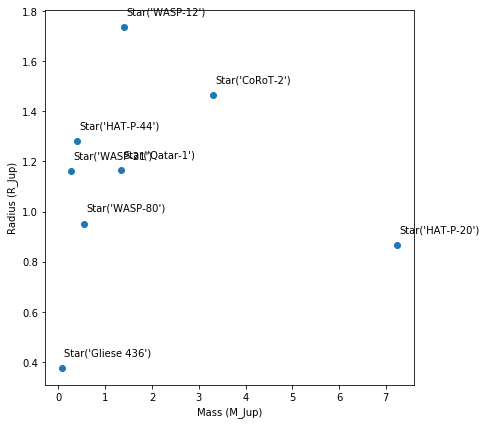

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
#df_params.plot(x='mass', y='radius', kind='scatter')

fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(df_params['mass'], df_params['radius'], 'o')

counter=0
for x,y in zip(df_params.mass, df_params.radius):
    ax.text(x+0.05,y+0.05, df_params.index[counter])
    counter+=1
    
plt.xlabel('Mass (M_Jup)')
plt.ylabel('Radius (R_Jup)')

## computing atmospheric parameters

In [ ]:
from exodata.equations import ScaleHeight as H

## Checking references

* [astroquery](http://astroquery.readthedocs.io/en/latest/)
* [ads](https://github.com/andycasey/ads/)

get ads api token [here](https://ui.adsabs.harvard.edu/#)

In [108]:
import ads
ads.__version__

'0.12.3'

In [129]:
key = open('ads_key.api', mode='r').read()
key =  key.strip('\n')
#set
ads.config.token = key
len(ads.config.token)

40

In [130]:
targets[0]

'HAT-P-44 b'

In [139]:
papers = ads.SearchQuery(q=targets[2]+'transiting exoplanets', sort="citation_count")

for paper in papers:
    print(paper.title)

['Solar System and Exoplanets']
['Progress with NASA Technology Development for Exoplanet Missions (TDEM)']
['The SEEDS of Planet Formation: Spiral Arms in the Disks of Herbig Ae-Fe Stars']


In [ ]:
title

In [143]:
url

'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?\n    table=exoplanets&select=pl_hostname,&format=ascii'

## NExSci

* [api](https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html)

In [152]:
#for python 3
import urllib.request 

url="https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets&select=pl_hostname,&format=ascii"

req = urllib.request.Request(url)
with urllib.request.urlopen(req) as response:
    html = response.read()

print("retrieving URL: {}".format(url))

retrieving URL: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets&select=pl_hostname,&format=ascii


In [158]:
import pandas as pd

dfs = pd.read_html(html)

ImportError: lxml not found, please install it

## astroquery

In [85]:
from astroquery.simbad import Simbad

queries = {}
for i in targets:
    try:
        queries[i]=Simbad.query_object(i)
    except Exception as e:
        print(e)

/home/Jerome/miniconda3/envs/moscatel/lib/python3.6/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME EPIC 96233 b
  (error.line, error.msg))
/home/Jerome/miniconda3/envs/moscatel/lib/python3.6/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME QATAR-1 b
  (error.line, error.msg))
/home/Jerome/miniconda3/envs/moscatel/lib/python3.6/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME COROT-5B b
  (error.line, error.msg))


In [87]:
queries.keys()

dict_keys(['HAT-P-44 b', 'HAT-P-20 b', 'EPIC 96233 b', 'GJ 436 b', 'WASP 21 b', 'WASP 12 b ', 'WASP 80 b', 'XO-2 b', 'QATAR-1 b', 'K2-95 b', 'COROT-5B b'])

In [88]:
queries['HAT-P-44 b']

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
HAT-P-44b,14 12 34.567,+47 00 52.98,7,7,17.000,17.000,90,B,O,2003yCat.1289....0Z
